In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Path to the dataset
dataset_dir = r'C:\Users\Akhil M\Downloads\GTSRB\training'

# Initialize data lists
images = []
labels = []

# Iterate through each class folder (assuming folder names are '00000', '00001', ..., '00042')
for label_folder in range(0, 43):  # Folder names range from '00000' to '00042'
    class_dir = os.path.join(dataset_dir, f"{label_folder:05d}")  # Format folder name as '00000', '00001', etc.
    
    # Check if folder exists
    if not os.path.exists(class_dir):
        print(f"Class folder does not exist: {class_dir}")
        continue

    # Iterate through images in each class folder
    for filename in os.listdir(class_dir):
        if filename.endswith('.ppm'):  # Only process .ppm files
            img_path = os.path.join(class_dir, filename)

            # Read the image and check if it is loaded correctly
            img = cv2.imread(img_path)

            if img is None:
                print(f"Failed to load image: {img_path}")
                continue  # Skip this image if it's not loaded correctly

            # Preprocess the image (resize and normalize)
            img = cv2.resize(img, (32, 32))  # Resize to match model input
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            img = img / 255.0  # Normalize the image

            images.append(img)
            labels.append(label_folder)  # Label corresponds to folder (0-based indexing)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=43)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, y_test are ready for training


In [9]:


# Set paths


# Define CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




C:\Users\Akhil M\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the model
checkpoint = ModelCheckpoint("traffic_sign_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
history = model.fit(
    X_train, y_train,
    epochs=15,
    validation_split=0.2,  # Automatically splits 20% of training data for validation
    batch_size=64,
    callbacks=[checkpoint],
    verbose=1
)



Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1840 - loss: 3.1802
Epoch 1: val_accuracy improved from -inf to 0.65470, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1845 - loss: 3.1781 - val_accuracy: 0.6547 - val_loss: 1.3301
Epoch 2/15
265/267 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5849 - loss: 1.3886
Epoch 2: val_accuracy improved from 0.65470 to 0.87004, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5855 - loss: 1.3864 - val_accuracy: 0.8700 - val_loss: 0.5587
Epoch 3/15
264/267 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7641 - loss: 0.7731
Epoch 3: val_accuracy improved from 0.87004 to 0.93760, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7644 - loss: 0.7720 - val_accuracy: 0.9376 - val_loss: 0.2813
Epoch 4/15
263/267 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8349 - loss: 0.5227
Epoch 4: val_accuracy improved from 0.93760 to 0.95895, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8351 - loss: 0.5223 - val_accuracy: 0.9589 - val_loss: 0.2051
Epoch 5/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8585 - loss: 0.4327
Epoch 5: val_accuracy improved from 0.95895 to 0.96974, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8586 - loss: 0.4325 - val_accuracy: 0.9697 - val_loss: 0.1499
Epoch 6/15
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8978 - loss: 0.3279
Epoch 6: val_accuracy improved from 0.96974 to 0.97396, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8978 - loss: 0.3279 - val_accuracy: 0.9740 - val_loss: 0.1394
Epoch 7/15
265/267 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9084 - loss: 0.2979
Epoch 7: val_accuracy improved from 0.97396 to 0.98264, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9084 - loss: 0.2978 - val_accuracy: 0.9826 - val_loss: 0.0876
Epoch 8/15
264/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9216 - loss: 0.2504
Epoch 8: val_accuracy did not improve from 0.98264
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9216 - loss: 0.2504 - val_accuracy: 0.9765 - val_loss: 0.0997
Epoch 9/15
264/267 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9241 - loss: 0.2325
Epoch 9: val_accuracy improved from 0.98264 to 0.98710, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9242 - loss: 0.2324 - val_accuracy: 0.9871 - val_loss: 0.0656
Epoch 10/15
264/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9375 - loss: 0.1932
Epoch 10: val_accuracy did not improve from 0.98710
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9375 - loss: 0.1932 - val_accuracy: 0.9862 - val_loss: 0.0738
Epoch 11/15
264/267 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9438 - loss: 0.1772
Epoch 11: val_accuracy did not improve from 0.98710
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9437 - loss: 0.1773 - val_accuracy: 0.9866 - val_loss: 0.0599
Epoch 12/15
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9446 - loss: 0.1676
Epoch 12: val_accuracy did not improve from 0.98710
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9446 - loss: 0.1675 - val_accuracy: 0.9857 - val_loss: 0.0586
Epoch 13/15
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9565 - loss: 0.1418
Epoch 13: val_accura

267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9565 - loss: 0.1419 - val_accuracy: 0.9901 - val_loss: 0.0533
Epoch 14/15
265/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9537 - loss: 0.1439
Epoch 14: val_accuracy did not improve from 0.99015
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9537 - loss: 0.1439 - val_accuracy: 0.9871 - val_loss: 0.0554
Epoch 15/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9544 - loss: 0.1387
Epoch 15: val_accuracy improved from 0.99015 to 0.99132, saving model to traffic_sign_model.h5


267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9544 - loss: 0.1387 - val_accuracy: 0.9913 - val_loss: 0.0450


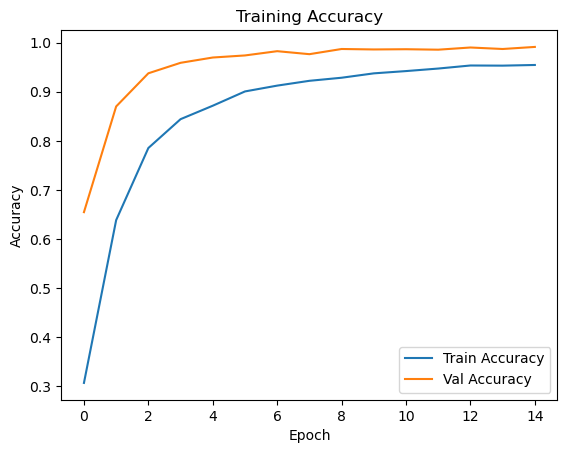

In [12]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()